# Oil Production Prediction

## Objective

#### To build and predict the annual oil production rates of various oil wells with the most accurate Machine-learning Models 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from scipy.stats import uniform
from sklearn.pipeline import Pipeline

#### Loading Data

In [6]:
data=pd.read_csv('oil-and-gas-summary-production-data-1967-1999-1 (2).csv')

In [7]:
df=pd.DataFrame(data)

In [8]:
df.head(10)

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,530,0,0,NaN,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,02/12/1996,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,BRADFORD,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
5,1995,04/02/1996,"Cotton Well Drilling Company, Inc.",Chautauqua,SHERIDAN,LAKESHORE,MEDINA,0,0,13,2,0,0,NO,0,27742,377,24177,GK,"SHERIDAN, NY\n(42.485764, -79.241801)"
6,1994,04/05/1995,"Oil, Gas & Land Services, Inc.",Chautauqua,ELLERY,ELLERY,ONONDAGA-BASS ISLAND,1,3,1,0,0,0,NO,96,1582,730,1439,"GX,OA","ELLERY, NY\n(42.159868, -79.393216)"
7,1994,03/15/1995,"Traxler, Joyce",Genesee,LE ROY,UHLEY CORNERS-CALEDONIA,MEDINA,0,0,1,0,0,0,YES,0,500,0,0,NaN,"LE ROY, NY\n(42.977677, -77.987588)"
8,1995,09/12/1996,Cunningham Natural Gas Corp.,Allegany,WILLING,STATE LINE,ORISKANY,0,0,1,3,0,0,NO,0,484927,0,484927,GX,"WILLING, NY\n(42.085346, -77.922864)"
9,1995,10/18/1996,"Crowell, Walter R.",Chautauqua,VILLENOVA,LAKESHORE,MEDINA,0,0,1,0,0,0,YES,0,100,0,0,NaN,"VILLENOVA, NY\n(42.391743, -79.119456)"


In [9]:
df.tail(4)

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
30049,1994,03/02/1995,P & G Oil Co.,Allegany,WILLING,FULMER VALLEY,RICHBURG,0,7,0,0,0,0,INACTIVE,0,0,0,0,NaN,"WILLING, NY\n(42.085346, -77.922864)"
30050,1994,02/13/1995,"Vandermark Exploration, Inc.",Steuben,WEST UNION,UNNAMED,ORISKANY,0,0,0,2,0,0,INACTIVE,0,0,0,0,NaN,"WEST UNION, NY\n(42.094951, -77.725816)"
30051,1995,03/26/1996,Columbia Natural Resources LLC,Chautauqua,GERRY,LAKESHORE,MEDINA,0,0,1,0,0,0,NO,0,3370,0,3370,GH,"GERRY, NY\n(42.194749, -79.250394)"
30052,1995,04/04/1996,Belden & Blake Corporation,Erie,BRANT,BRANT-EDEN,MEDINA,0,0,5,0,0,0,YES,0,30615,146,30615,GX,"BRANT, NY\n(42.58859, -79.044449)"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30053 entries, 0 to 30052
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Production Year          30053 non-null  int64 
 1   Production Date Entered  30053 non-null  object
 2   Operator                 30053 non-null  object
 3   County                   30022 non-null  object
 4   Town                     29396 non-null  object
 5   Field                    28772 non-null  object
 6   Producing Formation      29393 non-null  object
 7   Active Oil Wells         30053 non-null  int64 
 8   Inactive Oil Wells       30053 non-null  int64 
 9   Active Gas Wells         30053 non-null  int64 
 10  Inactive Gas Wells       30053 non-null  int64 
 11  Injection Wells          30053 non-null  int64 
 12  Disposal Wells           30053 non-null  int64 
 13  Self-use Well            29434 non-null  object
 14  Oil Produced, bbl        30053 non-nul

##### There are 11 features with int datatype and 9 features with object datatype

In [12]:
df.shape

(30053, 20)

##### The data consist of 30053 rows and 20 columns

In [14]:
df.describe()

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf"
count,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,30053.000000,3.005300e+04,3.005300e+04,3.005300e+04
mean,1987.929225,5.040262,1.391209,3.724553,0.600106,1.270489,0.044821,811.933118,1.811270e+04,6.251382e+03,9.025647e+03
std,7.935213,25.146264,8.449948,12.362509,2.449830,16.456011,5.093759,8263.100877,8.805514e+04,1.787794e+05,7.249590e+04
min,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1983.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1989.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.210000e+02,0.000000e+00,0.000000e+00
75%,1994.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.206000e+03,0.000000e+00,0.000000e+00
max,1999.000000,1273.000000,360.000000,684.000000,118.000000,1108.000000,846.000000,675589.000000,4.827263e+06,1.759123e+07,4.827263e+06


In [15]:
df.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Producing Formation', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl',
       'Taxable Gas, Mcf', 'Purchaser Codes', 'Location'],
      dtype='object')

### Data Pre-Processing

#### Handling  Null Values

df.isnull().sum()

In [19]:
# 1. Handling null values
print("\n1. Handling null values:")

df['County'] = df['County'].fillna('Unknown')
df['Town']= df['Town'].fillna('Unknown')
df['Field']=df['Field'].fillna('Unnamed')
df['Self-use Well']= df['Self-use Well'].fillna('Inactive')
df['Purchaser Codes']= df['Purchaser Codes'].fillna('Unknown')

df=df.drop('Producing Formation',axis =1)

print(df.isnull().sum())


1. Handling null values:
Production Year            0
Production Date Entered    0
Operator                   0
County                     0
Town                       0
Field                      0
Active Oil Wells           0
Inactive Oil Wells         0
Active Gas Wells           0
Inactive Gas Wells         0
Injection Wells            0
Disposal Wells             0
Self-use Well              0
Oil Produced, bbl          0
Gas Produced, Mcf          0
Water produced, bbl        0
Taxable Gas, Mcf           0
Purchaser Codes            0
Location                   0
dtype: int64


In [20]:
df.head(10)

,Production Year,Production Date Entered,Operator,County,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,0,0,1,0,0,0,YES,0,106,0,0,Unknown,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,3,0,0,0,0,0,NO,462,0,0,0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,0,0,1,0,0,0,YES,0,530,0,0,Unknown,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,02/12/1996,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,10,0,0,0,0,0,NO,45,0,80,0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
5,1995,04/02/1996,"Cotton Well Drilling Company, Inc.",Chautauqua,SHERIDAN,LAKESHORE,0,0,13,2,0,0,NO,0,27742,377,24177,GK,"SHERIDAN, NY\n(42.485764, -79.241801)"
6,1994,04/05/1995,"Oil, Gas & Land Services, Inc.",Chautauqua,ELLERY,ELLERY,1,3,1,0,0,0,NO,96,1582,730,1439,"GX,OA","ELLERY, NY\n(42.159868, -79.393216)"
7,1994,03/15/1995,"Traxler, Joyce",Genesee,LE ROY,UHLEY CORNERS-CALEDONIA,0,0,1,0,0,0,YES,0,500,0,0,Unknown,"LE ROY, NY\n(42.977677, -77.987588)"
8,1995,09/12/1996,Cunningham Natural Gas Corp.,Allegany,WILLING,STATE LINE,0,0,1,3,0,0,NO,0,484927,0,484927,GX,"WILLING, NY\n(42.085346, -77.922864)"
9,1995,10/18/1996,"Crowell, Walter R.",Chautauqua,VILLENOVA,LAKESHORE,0,0,1,0,0,0,YES,0,100,0,0,Unknown,"VILLENOVA, NY\n(42.391743, -79.119456)"


#### Handling duplicates 

In [22]:
df.duplicated().sum()

20

In [23]:
df=df.drop_duplicates()

print("/n2.After Handling Duplicates:")
print("Number of duplicate rows:", df.duplicated().sum())

/n2.After Handling Duplicates:
Number of duplicate rows: 0


##### Categorical and numerical columns

In [25]:
num_cols = df.select_dtypes(include='number').columns
print("Total Numerical Features:",num_cols.shape)
print("Numeric Features:",num_cols)

Total Numerical Features: (11,)
Numeric Features: Index(['Production Year', 'Active Oil Wells', 'Inactive Oil Wells',
       'Active Gas Wells', 'Inactive Gas Wells', 'Injection Wells',
       'Disposal Wells', 'Oil Produced, bbl', 'Gas Produced, Mcf',
       'Water produced, bbl', 'Taxable Gas, Mcf'],
      dtype='object')


In [26]:
cat_cols = df.select_dtypes(include='object').columns
print("Total Categorical Features:",cat_cols.shape)
print("Categorical Features:",cat_cols)

Total Categorical Features: (8,)
Categorical Features: Index(['Production Date Entered', 'Operator', 'County', 'Town', 'Field',
       'Self-use Well', 'Purchaser Codes', 'Location'],
      dtype='object')


In [27]:
df.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Active Oil Wells', 'Inactive Oil Wells',
       'Active Gas Wells', 'Inactive Gas Wells', 'Injection Wells',
       'Disposal Wells', 'Self-use Well', 'Oil Produced, bbl',
       'Gas Produced, Mcf', 'Water produced, bbl', 'Taxable Gas, Mcf',
       'Purchaser Codes', 'Location'],
      dtype='object')

#### Handling Outliers

##### Checking for outliers

In [30]:
# Calculate Q1, Q3, and IQR
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))
print("Number of outliers in each column:")
print(outliers.sum())

Number of outliers in each column:
Production Year           0
Active Oil Wells       6597
Inactive Oil Wells     3524
Active Gas Wells       3891
Inactive Gas Wells     6853
Injection Wells         758
Disposal Wells           46
Oil Produced, bbl      6533
Gas Produced, Mcf      4663
Water produced, bbl    7444
Taxable Gas, Mcf       7193
dtype: int64


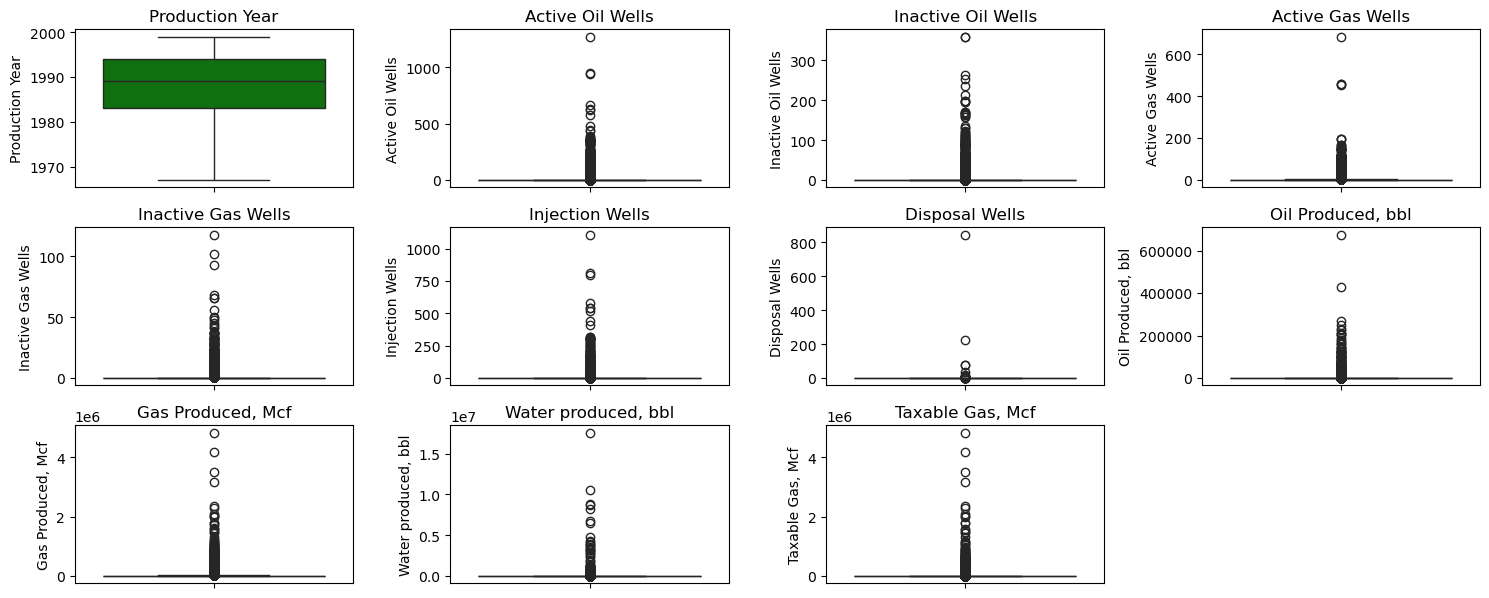

In [31]:
plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df[col], color='Green')
    plt.title(col)
plt.tight_layout()
plt.show()

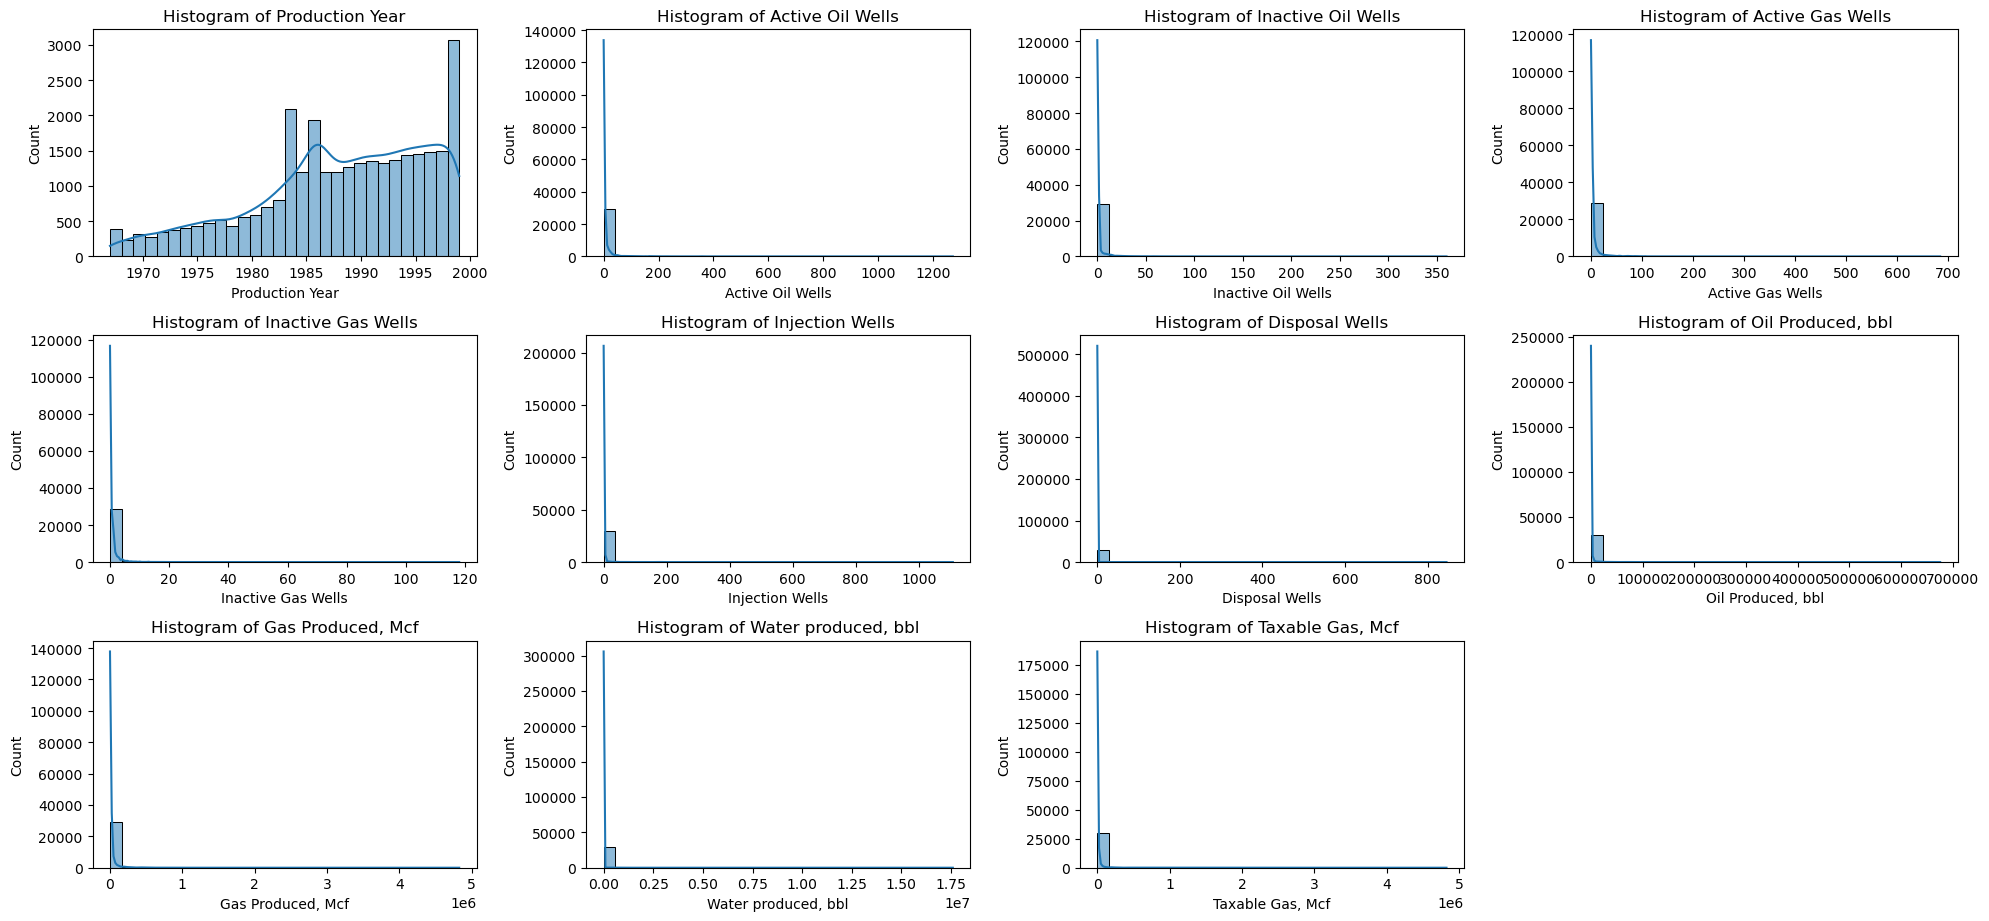

In [32]:
df1= df.copy()
plt.figure(figsize=(20, 15))
for i, col in enumerate(df1[num_cols], 1):
    plt.subplot(5, 4, i)  # Adjust rows/columns based on the number of features
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

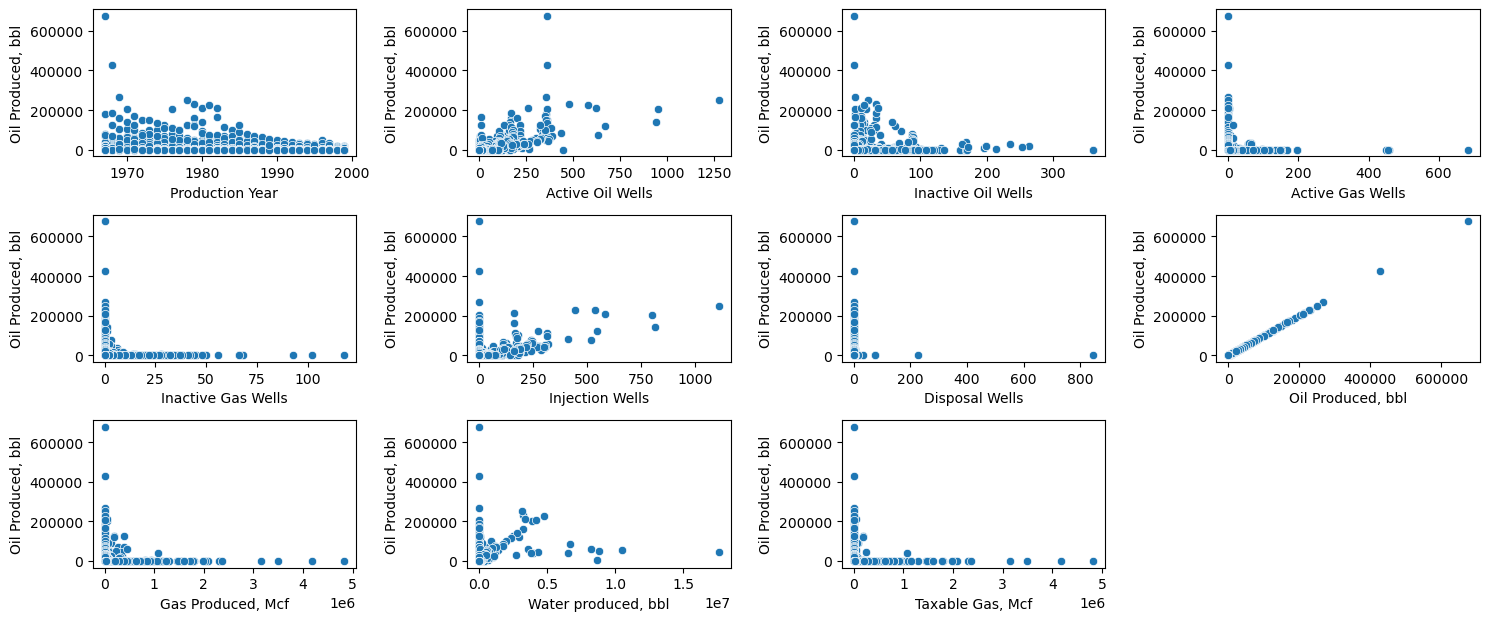

In [33]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df1[num_cols]):
    plt.subplot(5, 4, i+1)
    sns.scatterplot(data=df1,x=col,y='Oil Produced, bbl')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### Handling Outliers using caping

In [35]:
df1 = df.copy()

# Cap outliers to the threshold values (IQR method)
df1[num_cols] = df1[num_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)

print("Shape after capping outliers:", df1[num_cols].shape)

Shape after capping outliers: (30033, 11)


In [36]:
df1.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Active Oil Wells', 'Inactive Oil Wells',
       'Active Gas Wells', 'Inactive Gas Wells', 'Injection Wells',
       'Disposal Wells', 'Self-use Well', 'Oil Produced, bbl',
       'Gas Produced, Mcf', 'Water produced, bbl', 'Taxable Gas, Mcf',
       'Purchaser Codes', 'Location'],
      dtype='object')

In [120]:
def outliers(df):
    for col in df.select_dtypes(include=['int64','float64']).columns:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3 - Q1
        lower=Q1-(1.5*IQR)
        upper=Q3+(1.5*IQR)


        #Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x >upper else x)

    return df

In [122]:
df1=outliers(df)
df1

,Production Year,Production Date Entered,Operator,County,Town,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,106.0,0.0,0.0,Unknown,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"
2,1994,02/14/1995,"White, Walter W. & Christina L.",Cattaraugus,CARROLLTON,BRADFORD,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"CARROLLTON, NY\n(42.023289, -78.628438)"
3,1994,01/19/1995,"Stiegler, Richard M",Erie,CHEEKTOWAGA,BUFFALO,0.0,0.0,1.0,0.0,0.0,0.0,YES,0.0,530.0,0.0,0.0,Unknown,"CHEEKTOWAGA, NY\n(42.907071, -78.754318)"
4,1995,02/12/1996,"Bucher, Charles J",Cattaraugus,ALLEGANY,FIVE MILE,0.0,0.0,0.0,0.0,0.0,0.0,NO,0.0,0.0,0.0,0.0,OA,"ALLEGANY, NY\n(42.088061, -78.491258)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,03/18/1996,"Eastern States Energy, Inc.",Erie,EVANS,BRANT-EDEN,0.0,0.0,5.0,0.0,0.0,0.0,NO,0.0,18032.5,0.0,0.0,GK,"EVANS, NY\n(42.638457, -79.027689)"
30049,1994,03/02/1995,P & G Oil Co.,Allegany,WILLING,FULMER VALLEY,0.0,0.0,0.0,0.0,0.0,0.0,INACTIVE,0.0,0.0,0.0,0.0,Unknown,"WILLING, NY\n(42.085346, -77.922864)"
30050,1994,02/13/1995,"Vandermark Exploration, Inc.",Steuben,WEST UNION,UNNAMED,0.0,0.0,0.0,0.0,0.0,0.0,INACTIVE,0.0,0.0,0.0,0.0,Unknown,"WEST UNION, NY\n(42.094951, -77.725816)"
30051,1995,03/26/1996,Columbia Natural Resources LLC,Chautauqua,GERRY,LAKESHORE,0.0,0.0,1.0,0.0,0.0,0.0,NO,0.0,3370.0,0.0,0.0,GH,"GERRY, NY\n(42.194749, -79.250394)"


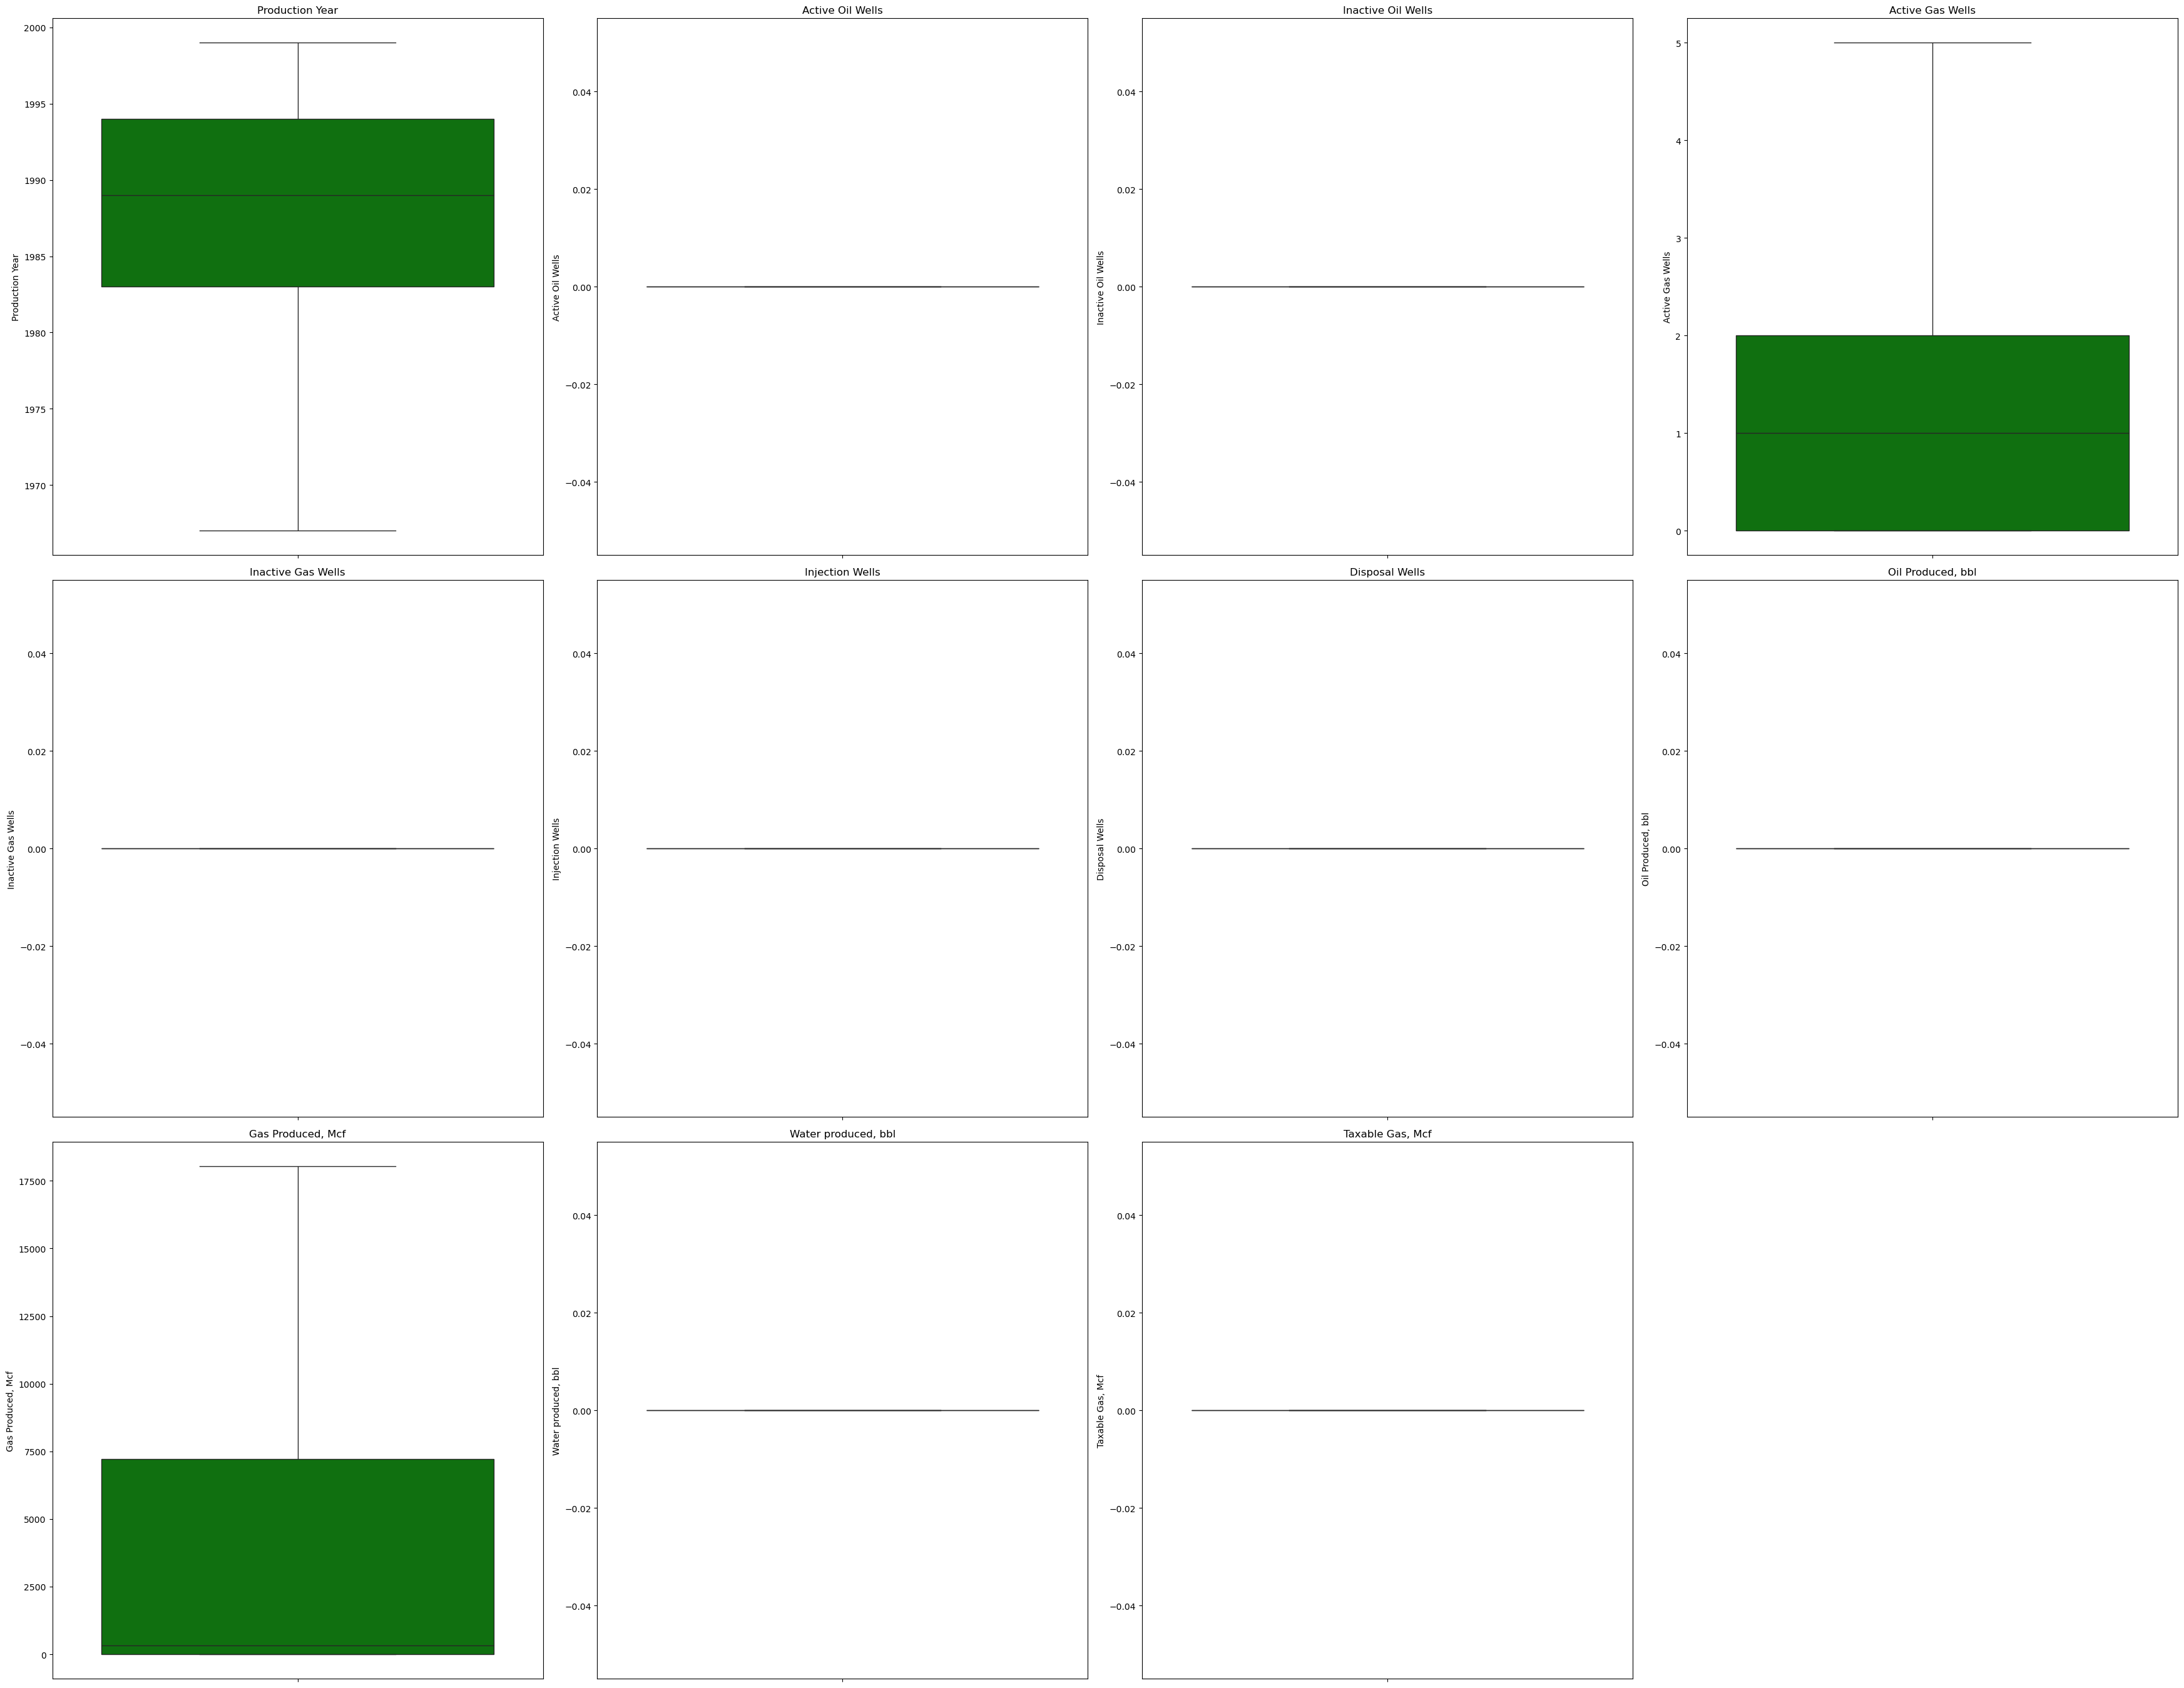

In [132]:
plt.figure(figsize=(35,45))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='Green')
    plt.title(col)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,10))
for i,col in enumerate(num_cols):
    plt.subplot(5,4,i+1)
    sns.boxplot(y=df1[col], color='green')
    plt.title(col)
plt.tight_layout()
plt.show()

#### Skewness

In [40]:
skewness = df[num_cols].skew()

# Categorize skewness
no_skewness = skewness[(skewness >= -0.5) & (skewness <= 0.5)]
moderate_skewness = skewness[(skewness > 0.5) & (skewness <= 1) | (skewness < -0.5) & (skewness >= -1)]
high_skewness = skewness[(skewness > 1) | (skewness < -1)]

# Display results
print("Skewness of Numeric Columns:\n", skewness)
print("\nNo Skewness:\n", no_skewness)
print("\nModerate Skewness:\n", moderate_skewness)
print("\nHigh Skewness:\n", high_skewness)

Skewness of Numeric Columns:
 Production Year         -0.618810
Active Oil Wells        15.750225
Inactive Oil Wells      16.247360
Active Gas Wells        14.829819
Inactive Gas Wells      15.901896
Injection Wells         29.622867
Disposal Wells         155.510825
Oil Produced, bbl       33.871931
Gas Produced, Mcf       20.096059
Water produced, bbl     57.042612
Taxable Gas, Mcf        31.683600
dtype: float64

No Skewness:
 Series([], dtype: float64)

Moderate Skewness:
 Production Year   -0.61881
dtype: float64

High Skewness:
 Active Oil Wells        15.750225
Inactive Oil Wells      16.247360
Active Gas Wells        14.829819
Inactive Gas Wells      15.901896
Injection Wells         29.622867
Disposal Wells         155.510825
Oil Produced, bbl       33.871931
Gas Produced, Mcf       20.096059
Water produced, bbl     57.042612
Taxable Gas, Mcf        31.683600
dtype: float64


In [41]:
corr1 = df1[num_cols].corr()

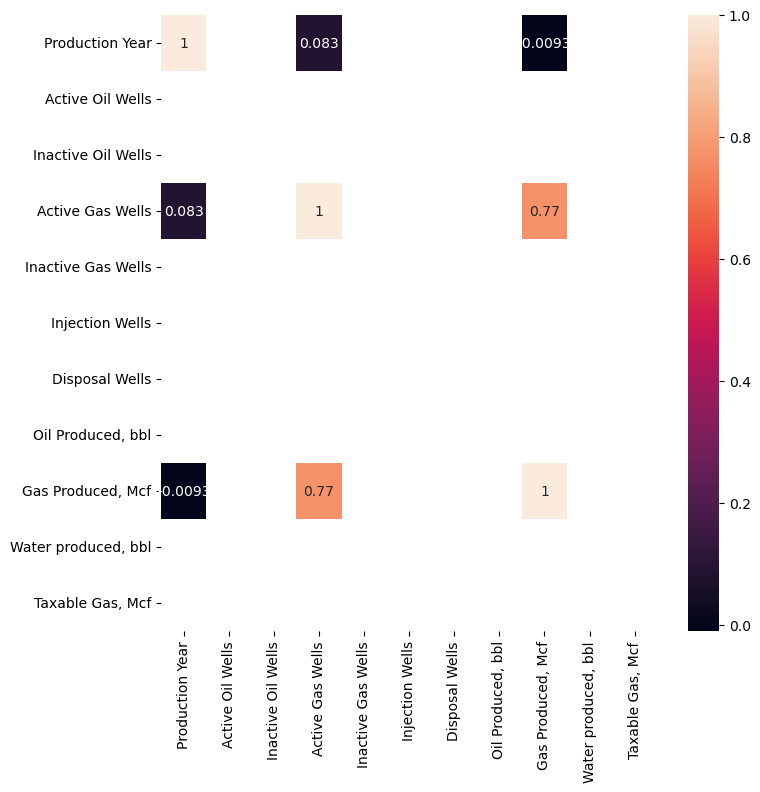

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(corr1, annot=True)
plt.savefig("corre.png")
plt.show()

In [48]:
df1.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Active Oil Wells', 'Inactive Oil Wells',
       'Active Gas Wells', 'Inactive Gas Wells', 'Injection Wells',
       'Disposal Wells', 'Self-use Well', 'Oil Produced, bbl',
       'Gas Produced, Mcf', 'Water produced, bbl', 'Taxable Gas, Mcf',
       'Purchaser Codes', 'Location'],
      dtype='object')

In [49]:
# One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['Production Date Entered', 'Operator', 'County', 'Town', 'Field',
       'Self-use Well', 'Purchaser Codes', 'Location'])

In [50]:
df1

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl",...,"Location_WEST SENECA, NY\n(42.843272, -78.790813)","Location_WEST SPARTA, NY\n(42.626694, -77.77227)","Location_WEST UNION, NY\n(42.094951, -77.725816)","Location_WESTFIELD, NY\n(42.324884, -79.573821)","Location_WETHERSFIELD, NY\n(42.652108, -78.249954)","Location_WILLIAMSTOWN, NY\n(43.422718, -75.887516)","Location_WILLING, NY\n(42.085346, -77.922864)","Location_WIRT, NY\n(42.137408, -78.150594)","Location_YORK, NY\n(42.871099, -77.885584)","Location_YORKSHIRE, NY\n(42.530173, -78.472591)"
0,1995,0,0,1,0,0,0,0,106.0,0,...,False,False,False,False,False,False,False,False,False,False
1,1995,0,0,0,0,0,0,0,0.0,0,...,False,False,True,False,False,False,False,False,False,False
2,1994,0,0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
3,1994,0,0,1,0,0,0,0,530.0,0,...,False,False,False,False,False,False,False,False,False,False
4,1995,0,0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0,0,5,0,0,0,0,18032.5,0,...,False,False,False,False,False,False,False,False,False,False
30049,1994,0,0,0,0,0,0,0,0.0,0,...,False,False,False,False,False,False,True,False,False,False
30050,1994,0,0,0,0,0,0,0,0.0,0,...,False,False,True,False,False,False,False,False,False,False
30051,1995,0,0,1,0,0,0,0,3370.0,0,...,False,False,False,False,False,False,False,False,False,False


In [51]:
boolean_cols = df1.select_dtypes(include='bool').columns

df1[boolean_cols] = df1[boolean_cols].astype(int)

#df1 = df1.astype(int)

In [52]:
df1

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl",...,"Location_WEST SENECA, NY\n(42.843272, -78.790813)","Location_WEST SPARTA, NY\n(42.626694, -77.77227)","Location_WEST UNION, NY\n(42.094951, -77.725816)","Location_WESTFIELD, NY\n(42.324884, -79.573821)","Location_WETHERSFIELD, NY\n(42.652108, -78.249954)","Location_WILLIAMSTOWN, NY\n(43.422718, -75.887516)","Location_WILLING, NY\n(42.085346, -77.922864)","Location_WIRT, NY\n(42.137408, -78.150594)","Location_YORK, NY\n(42.871099, -77.885584)","Location_YORKSHIRE, NY\n(42.530173, -78.472591)"
0,1995,0,0,1,0,0,0,0,106.0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995,0,0,0,0,0,0,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
2,1994,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,1994,0,0,1,0,0,0,0,530.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0,0,5,0,0,0,0,18032.5,0,...,0,0,0,0,0,0,0,0,0,0
30049,1994,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
30050,1994,0,0,0,0,0,0,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
30051,1995,0,0,1,0,0,0,0,3370.0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the dataset and setting the target variable

In [54]:
df1=df1.rename(columns={'Oil Produced, bbl':'Oil_Production'})

In [55]:
df1.columns

Index(['Production Year', 'Active Oil Wells', 'Inactive Oil Wells',
       'Active Gas Wells', 'Inactive Gas Wells', 'Injection Wells',
       'Disposal Wells', 'Oil_Production', 'Gas Produced, Mcf',
       'Water produced, bbl',
       ...
       'Location_WEST SENECA, NY\n(42.843272, -78.790813)',
       'Location_WEST SPARTA, NY\n(42.626694, -77.77227)',
       'Location_WEST UNION, NY\n(42.094951, -77.725816)',
       'Location_WESTFIELD, NY\n(42.324884, -79.573821)',
       'Location_WETHERSFIELD, NY\n(42.652108, -78.249954)',
       'Location_WILLIAMSTOWN, NY\n(43.422718, -75.887516)',
       'Location_WILLING, NY\n(42.085346, -77.922864)',
       'Location_WIRT, NY\n(42.137408, -78.150594)',
       'Location_YORK, NY\n(42.871099, -77.885584)',
       'Location_YORKSHIRE, NY\n(42.530173, -78.472591)'],
      dtype='object', length=3937)

In [56]:
y= df1.Oil_Production

In [57]:
x=df1.drop('Oil_Production',axis=1)

In [58]:
x

,Production Year,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",...,"Location_WEST SENECA, NY\n(42.843272, -78.790813)","Location_WEST SPARTA, NY\n(42.626694, -77.77227)","Location_WEST UNION, NY\n(42.094951, -77.725816)","Location_WESTFIELD, NY\n(42.324884, -79.573821)","Location_WETHERSFIELD, NY\n(42.652108, -78.249954)","Location_WILLIAMSTOWN, NY\n(43.422718, -75.887516)","Location_WILLING, NY\n(42.085346, -77.922864)","Location_WIRT, NY\n(42.137408, -78.150594)","Location_YORK, NY\n(42.871099, -77.885584)","Location_YORKSHIRE, NY\n(42.530173, -78.472591)"
0,1995,0,0,1,0,0,0,106.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1995,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1994,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1994,0,0,1,0,0,0,530.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1995,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30048,1995,0,0,5,0,0,0,18032.5,0,0,...,0,0,0,0,0,0,0,0,0,0
30049,1994,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
30050,1994,0,0,0,0,0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
30051,1995,0,0,1,0,0,0,3370.0,0,0,...,0,0,0,0,0,0,0,0,0,0
